In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

In [3]:
import pymc3
    
from pymc3 import Poisson
x = Poisson.dist(mu=1)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
samples = x.random(size=10000)

In [5]:
samples.mean()

1.0118

(array([3.589e+03, 3.703e+03, 1.928e+03, 5.960e+02, 1.540e+02, 2.600e+01,
        3.000e+00, 1.000e+00]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

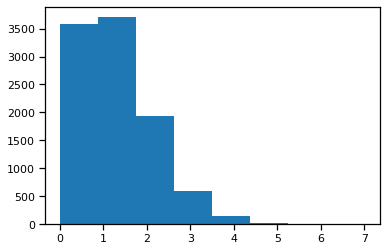

In [6]:
plt.hist(samples, bins=len(set(samples)))

In [7]:
from pymc3 import Normal
y = Normal.dist(mu=-2, sd=4)
samples = y.random(size=10000)

In [8]:
samples.mean()

-1.9853448415449464

In [9]:
samples.std()

4.001645659179313

(array([  11.,   82.,  508., 1723., 2821., 2818., 1525.,  432.,   70.,
          10.]),
 array([-17.57808292, -14.42397737, -11.26987182,  -8.11576627,
         -4.96166071,  -1.80755516,   1.34655039,   4.50065594,
          7.65476149,  10.80886704,  13.96297259]),
 <BarContainer object of 10 artists>)

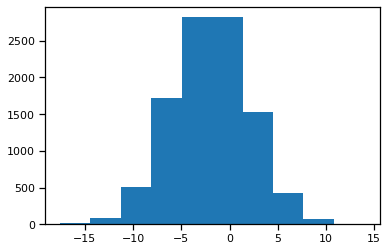

In [10]:
plt.hist(samples)

In [11]:
radon = pd.read_csv('radon.csv', index_col=0)

In [12]:
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_radon', ylabel='Density'>

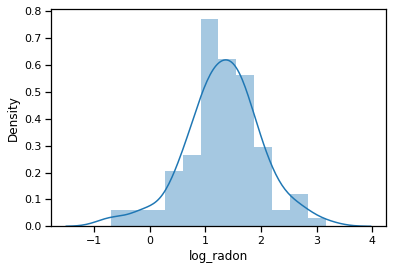

In [13]:
hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)

In [14]:
hennepin_radon.shape

(105,)

In [15]:
from pymc3 import Model, Uniform
with Model() as radon_model:
    u = Normal('u', mu=0, sd=10)
    o = Uniform('o', 0, 10)

In [17]:
with radon_model:
    y = Normal('y', mu=u, sd=o, observed=hennepin_radon)

In [18]:
from pymc3 import fit
with radon_model:
    samples = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 136.28


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'u'}>,
       <AxesSubplot:title={'center':'o'}>], dtype=object)

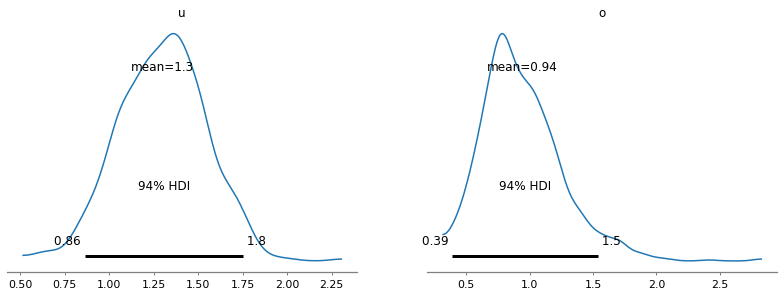

In [19]:
from pymc3 import plot_posterior
plot_posterior(samples)

In [20]:
mus = samples['u']
sigmas = samples['o']
mus

array([1.53131507, 1.56109105, 1.72234075, 1.13420831, 1.49800077,
       1.09247596, 1.55106252, 1.13013325, 1.14491412, 1.06217339,
       1.28163899, 1.00952043, 1.21003981, 1.18211037, 1.38445231,
       1.07691127, 1.24214706, 1.10377994, 1.38687618, 1.76345766,
       1.31530154, 0.90453827, 1.01818578, 1.48130426, 1.29352035,
       1.02859088, 1.29412141, 1.20021434, 0.80169626, 1.18607294,
       1.00635498, 0.86834761, 1.07085746, 1.04970186, 1.13974038,
       1.53602917, 1.73102087, 2.30512882, 1.39807538, 1.69072625,
       1.36551644, 1.26956056, 1.68738876, 1.51241919, 1.06341051,
       1.45417002, 1.52825656, 1.3529094 , 1.27644388, 1.22694071,
       1.54603076, 1.03815693, 1.25396186, 1.48387023, 1.54661269,
       1.34727844, 0.92606102, 1.12887726, 1.40241216, 1.34276523,
       1.20281482, 2.02665289, 1.26176568, 1.59512887, 1.09456703,
       1.43280779, 1.15409063, 1.11752027, 0.51574104, 1.69944917,
       1.54371147, 1.21695355, 1.33468758, 1.43211511, 0.82584

In [21]:
radon_samples = Normal.dist(mus, sigmas).random()

In [22]:
(radon_samples > np.log(4)).mean()

0.432

C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


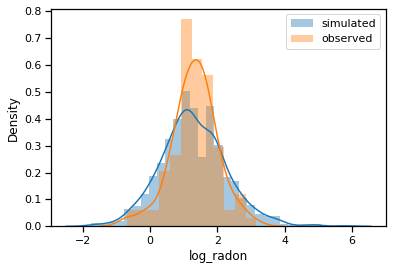

In [23]:
sns.distplot(radon_samples, label='simulated')
sns.distplot(hennepin_radon, label='observed')
plt.legend()

In [24]:
from pymc3 import Flat, HalfCauchy

with Model() as prior_sensitivity:
    u = Flat('u')
    o = HalfCauchy('o', 5)
    dist = Normal('dist', mu=u, sd=o, observed=hennepin_radon)
    sensitivity_samples = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 123.94


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'u'}>,
       <AxesSubplot:title={'center':'o'}>], dtype=object)

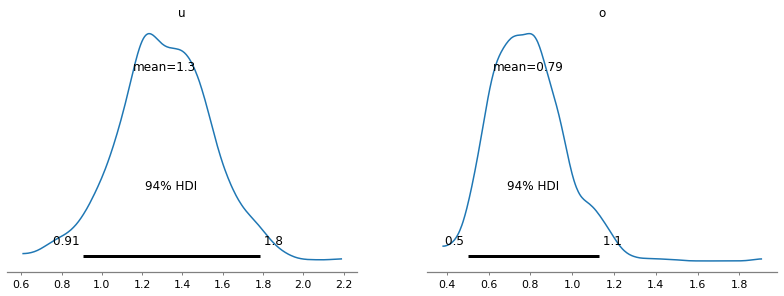

In [25]:
plot_posterior(sensitivity_samples)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'u'}>,
       <AxesSubplot:title={'center':'o'}>], dtype=object)

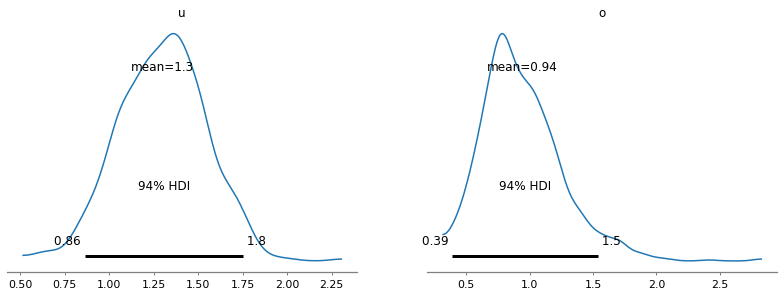

In [26]:
plot_posterior(samples)

In [27]:
drug = pd.DataFrame(dict(iq=(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,100,109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,96,103,124,101,101,100,101,101,104,100,101), groups='drug'))

In [28]:
placebo = pd.DataFrame(dict(iq=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,101,100,99,101,100,102,99,100,99), groups='placebo'))

In [29]:
trial_data = pd.concat([drug, placebo], ignore_index=True)

array([<AxesSubplot:title={'center':'drug'}>,
       <AxesSubplot:title={'center':'placebo'}>], dtype=object)

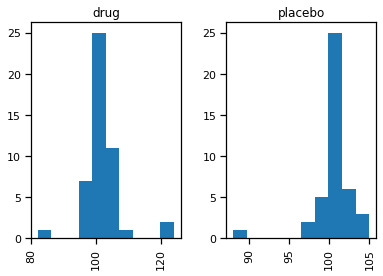

In [30]:
trial_data.hist('iq', by='groups')

In [31]:
from pymc3 import StudentT

In [32]:
t = StudentT.dist(nu=3).random(size=10000)
n = Normal.dist(0, 1).random(size=10000)

C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-10.0, 10.0)

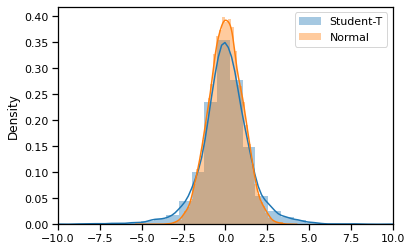

In [33]:
sns.distplot(t, label='Student-T')
sns.distplot(n, label='Normal')
plt.legend()
plt.xlim(-10, 10)

In [34]:
with Model() as drug_model:
    u_0 = Normal('u_0', 100, sd=10)
    u_1 = Normal('u_1', 100, sd=10)

In [35]:
with drug_model:
    o_0 = Uniform('o_0', lower=0, upper=20)
    o_1 = Uniform('o_1', lower=0, upper=20)

In [36]:
from pymc3 import Exponential

with drug_model:
    v = Exponential('v_minus_one', 1/29.) + 1

C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

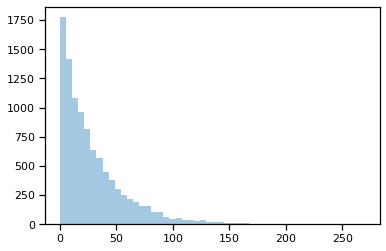

In [37]:
sns.distplot(Exponential.dist(1/29).random(size=10000), kde=False)

In [38]:
from pymc3 import StudentT
with drug_model:
    drug_like = StudentT('drug_like', nu=v, mu=u_1, lam=o_1**-2, observed=drug.iq)
    placebo_like = StudentT('placebo_like', nu=v, mu=u_0, lam=o_0**-2, observed=placebo.iq)

In [39]:
from pymc3 import Deterministic

with drug_model:
    diff_of_means = Deterministic('difference of means', u_1 - u_0)
    effect_size = Deterministic('effect size', diff_of_means / np.sqrt((o_1**2 + o_0**2) / 2))

In [40]:
with drug_model:
    drug_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 243.87


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'u_0'}>,
        <AxesSubplot:title={'center':'u_1'}>,
        <AxesSubplot:title={'center':'o_0'}>],
       [<AxesSubplot:title={'center':'o_1'}>,
        <AxesSubplot:title={'center':'v_minus_one'}>,
        <AxesSubplot:title={'center':'difference of means'}>],
       [<AxesSubplot:title={'center':'effect size'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

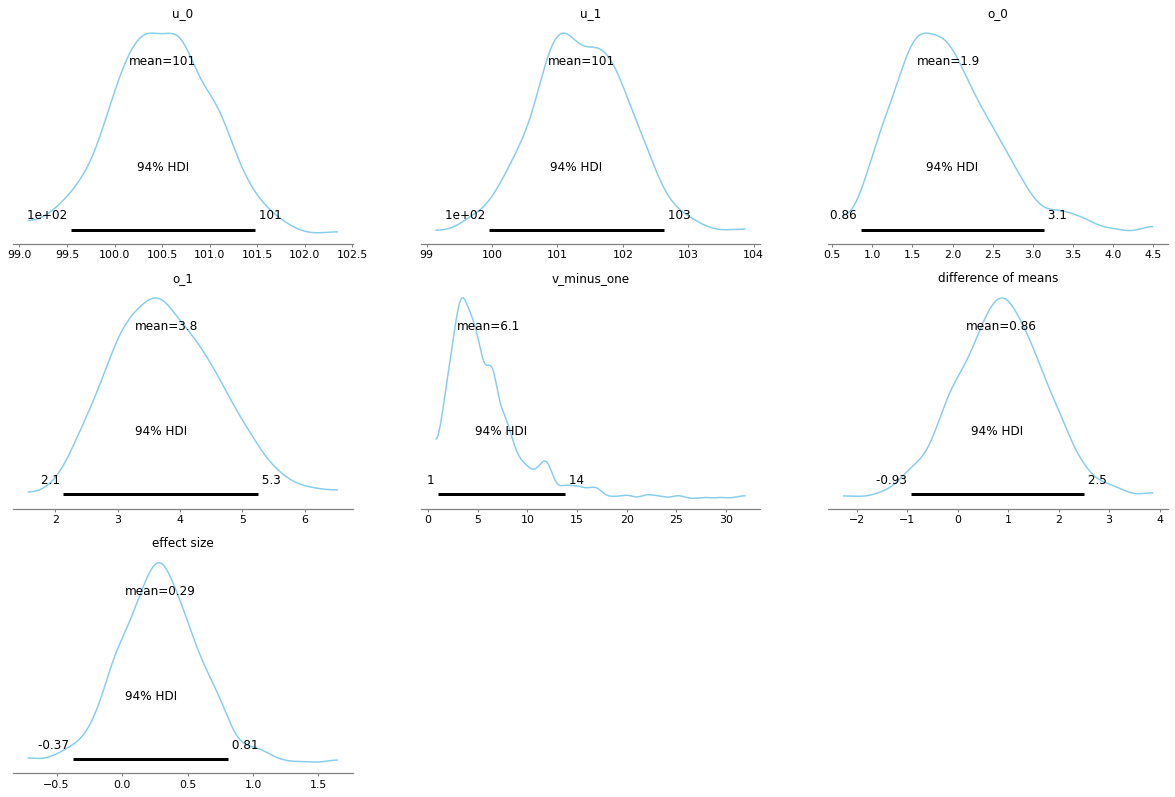

In [41]:
plot_posterior(drug_trace[100:], color='#87ceeb')

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'u_0'}>,
        <AxesSubplot:title={'center':'u_1'}>,
        <AxesSubplot:title={'center':'o_0'}>],
       [<AxesSubplot:title={'center':'o_1'}>,
        <AxesSubplot:title={'center':'v_minus_one'}>,
        <AxesSubplot:title={'center':'difference of means'}>],
       [<AxesSubplot:title={'center':'effect size'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

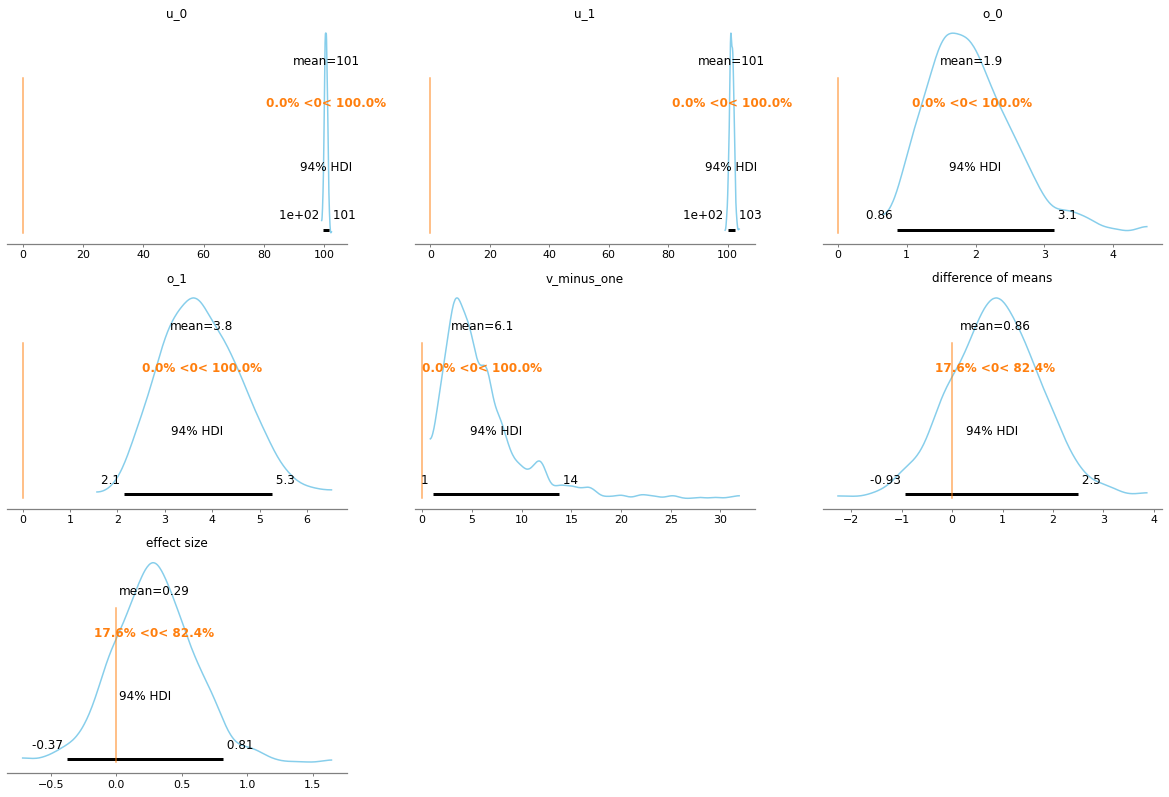

In [42]:
plot_posterior(drug_trace[100:], ref_val=0, color='#87ceeb')

In [43]:
nash_precip = pd.read_table('nashville_precip.txt', delimiter='\s+', na_values='NA', index_col=0)
nash_precip.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


In [44]:
july_rain = nash_precip.Jul
jan_rain = nash_precip.Jan

<AxesSubplot:>

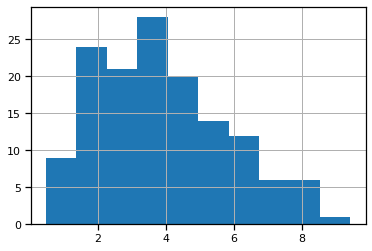

In [45]:
july_rain.hist()

In [46]:
from pymc3 import distributions
dir(distributions)

['AR',
 'AR1',
 'AsymmetricLaplace',
 'BART',
 'Bernoulli',
 'Beta',
 'BetaBinomial',
 'Binomial',
 'Bound',
 'Categorical',
 'Cauchy',
 'ChiSquared',
 'Constant',
 'ConstantDist',
 'Continuous',
 'DensityDist',
 'Dirichlet',
 'DirichletMultinomial',
 'Discrete',
 'DiscreteUniform',
 'DiscreteWeibull',
 'Distribution',
 'ExGaussian',
 'Exponential',
 'Flat',
 'GARCH11',
 'Gamma',
 'GaussianRandomWalk',
 'Geometric',
 'Gumbel',
 'HalfCauchy',
 'HalfFlat',
 'HalfNormal',
 'HalfStudentT',
 'HyperGeometric',
 'Interpolated',
 'InverseGamma',
 'KroneckerNormal',
 'Kumaraswamy',
 'LKJCholeskyCov',
 'LKJCorr',
 'Laplace',
 'LogNormal',
 'Logistic',
 'LogitNormal',
 'Lognormal',
 'MatrixNormal',
 'Mixture',
 'MixtureSameFamily',
 'Moyal',
 'Multinomial',
 'MvGaussianRandomWalk',
 'MvNormal',
 'MvStudentT',
 'MvStudentTRandomWalk',
 'NegativeBinomial',
 'NoDistribution',
 'Normal',
 'NormalMixture',
 'OrderedLogistic',
 'OrderedProbit',
 'Pareto',
 'Poisson',
 'Rice',
 'Simulator',
 'SkewNormal

<AxesSubplot:>

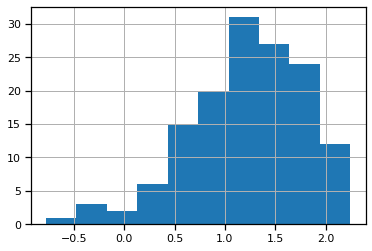

In [47]:
july_rain.apply(np.log).hist()

In [48]:
from pymc3 import Gamma
with Model() as rainfall_model:
    σ = Uniform('σ', 0, 1000)
    mu_jan = Uniform('mu_jan', 0, 25)
    mu_jul = Uniform('mu_jul', 0, 25)
    
    jan = Gamma('jan', mu=mu_jan, sd=σ, observed=jan_rain)
    jul = Gamma('jul', mu=mu_jul, sd=σ, observed=july_rain)
    
    d = Deterministic('d', mu_jan - mu_jul)

In [49]:
with rainfall_model:
    samples = fit(20000).sample(1000)

Finished [100%]: Average Loss = 911.11


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'σ'}>,
       <AxesSubplot:title={'center':'mu_jan'}>,
       <AxesSubplot:title={'center':'mu_jul'}>,
       <AxesSubplot:title={'center':'d'}>], dtype=object)

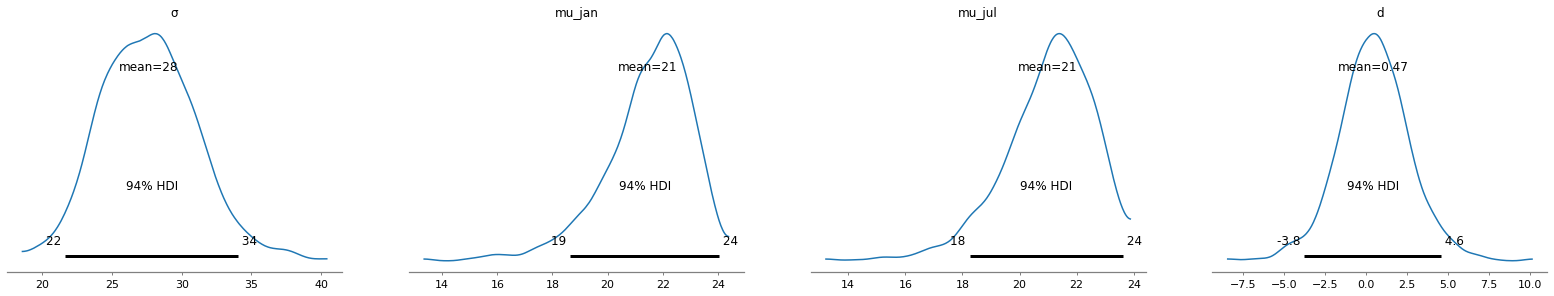

In [50]:
plot_posterior(samples)

In [51]:
vlbw = pd.read_csv('vlbw.csv', index_col=0).dropna(axis=0, subset=['ivh', 'pneumo'])
vlbw.head()

,birth,exit,hospstay,lowph,pltct,race,bwt,gest,inout,twn,...,vent,pneumo,pda,cld,pvh,ivh,ipe,year,sex,dead
5,81.593002,81.598999,2.0,6.969997,54.0,black,925.0,28.0,born at Duke,0.0,...,1.0,1.0,0.0,0.0,definite,definite,NaN,81.594055,female,1
6,81.601997,81.771004,62.0,7.189999,NaN,white,940.0,28.0,born at Duke,0.0,...,1.0,0.0,0.0,0.0,absent,absent,absent,81.602295,female,0
13,81.683998,81.853996,62.0,7.179996,182.0,black,1110.0,28.0,born at Duke,0.0,...,0.0,1.0,0.0,1.0,absent,absent,absent,81.684448,male,0
14,81.689003,81.877998,69.0,7.419998,361.0,white,1180.0,28.0,born at Duke,0.0,...,0.0,0.0,0.0,0.0,absent,absent,absent,81.689880,male,0
16,81.696999,81.952004,93.0,7.239998,255.0,black,770.0,26.0,born at Duke,0.0,...,1.0,0.0,0.0,1.0,absent,absent,absent,81.698120,male,0


In [52]:
pd.crosstab(vlbw.ivh, vlbw.pneumo)

pneumo,0.0,1.0
ivh,,
absent,359,73
definite,45,30
possible,6,4


In [53]:
ivh = vlbw.ivh.isin(['definite', 'possible']).astype(int).values
x = vlbw.pneumo.astype(int).values

C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


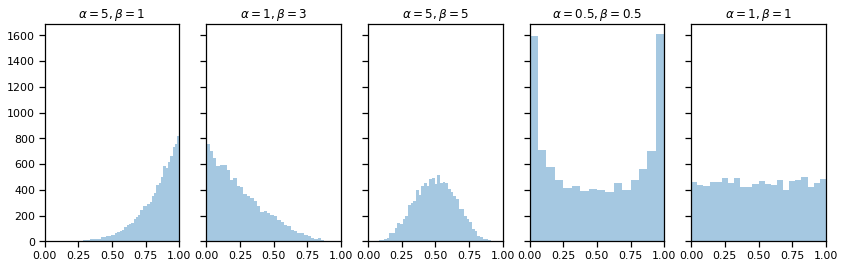

In [54]:
from pymc3 import Beta
params = (5, 1), (1, 3), (5, 5), (0.5, 0.5), (1, 1)

fig, axes = plt.subplots(1, len(params), figsize=(14, 4), sharey=True)
for ax, (alpha, beta) in zip(axes, params):
    sns.distplot(Beta.dist(alpha, beta).random(size=10000), ax=ax, kde=False)
    ax.set_xlim(0, 1)
    ax.set_title(r'$\alpha={0}, \beta={1}$'.format(alpha, beta))

In [55]:
with Model() as ivh_model:
    p = Beta('p', 1, 1, shape=2)

In [56]:
from pymc3 import Bernoulli

with ivh_model:
    bb_like = Bernoulli('bb_like', p=p[x], observed=ivh)

In [57]:
with ivh_model:
    ivh_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 226.71


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'p\n0'}>,
       <AxesSubplot:title={'center':'p\n1'}>], dtype=object)

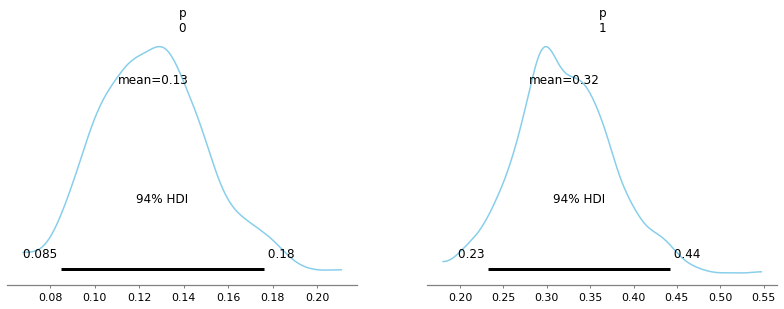

In [58]:
plot_posterior(ivh_trace[100:], color='#87ceeb')

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\008010636\.conda\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'p\n0'}>,
       <AxesSubplot:title={'center':'p\n1'}>], dtype=object)

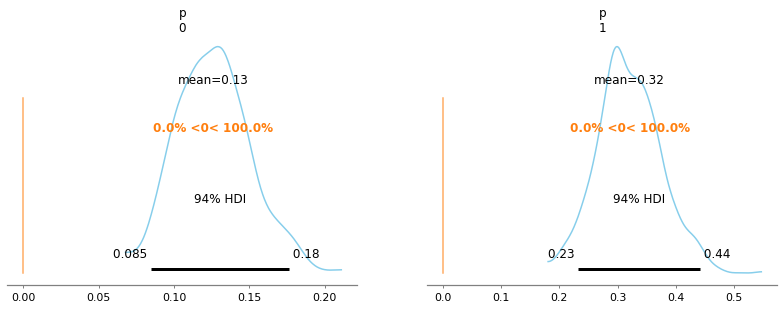

In [59]:
plot_posterior(ivh_trace[100:], ref_val=0, color='#87ceeb')

In [60]:
# From this assignment, I gained understanding on how I can apply statistics to gain meaningful information 
# from a data set. For example, I learned how to apply and test various distributions to a data set, and then 
# use this information to make predictions. I feel this will be helpful when we start to investigate mining 
# and analyzing real-world data. Even with all the data in the world, not knowing to use it to make predictions 
# or create knowledge will not be helpful. 

## Jonathan Doolittle